# 개인 정리 내용

# 0.라이브러리 세팅하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', family='AppleGothic')

# 1.데이터 불러오기

In [3]:
data = pd.read_csv('KOBIS.csv') # 데이터 읽어 오기 
data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       26197 non-null  int64 
 1   Movie_Name               26197 non-null  object
 2   Director                 24690 non-null  object
 3   Production_Company       11179 non-null  object
 4   Import_Company           15646 non-null  object
 5   Distributing_Agency      19546 non-null  object
 6   Release_Date             26176 non-null  object
 7   Movie_Type               26197 non-null  object
 8   Movie_Form               26178 non-null  object
 9   Nationality              26186 non-null  object
 10  National_number_screens  26197 non-null  object
 11  National_Sales           25141 non-null  object
 12  National_Audience        26197 non-null  object
 13  Seoul_Sales              25135 non-null  object
 14  Seoul_Audience           26197 non-nul

# 2.전처리

### 년도와 수익금과 장르를 사용해서 시각화!
- lineplot

In [5]:
# a, b = [1, 2], [3, 4]
# a[0] + b[0]
# a[0] = a[0] + b[0]
# a

In [6]:
data

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,26193,T-34,알렉세이 시도로프,NaN,㈜코리아스크린,㈜코리아스크린,2019-06-27,개봉영화,장편,러시아,1,"5,000",1,0,0,전쟁,12세이상관람가,독립/예술영화
26193,26194,V/H/S/2: 악마를 부르는 비디오,"가렛 에반스,아담 윈가드,에두아르도 산체스,그렉 헤일",NaN,(주)노이에스,(주)노이에스,2013-08-14,개봉영화,장편,미국,1,"300,000",75,0,0,공포(호러),청소년관람불가,일반영화
26194,26195,VIP전용 여자,카네다 사토시,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-01,개봉영화,장편,일본,1,"8,000",1,0,0,성인물(에로),청소년관람불가,일반영화
26195,26196,VJ의 은밀한 사생활,오카다 히로,NaN,(주)영진크리에이티브,(주)영진크리에이티브,2017-12-25,개봉영화,장편,일본,1,"6,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화


In [7]:

# data = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")

data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


In [8]:
# num_columns = ['Release_Date']
# data[num_columns] = data[num_columns].fillna('0000-00-00')
# data[num_columns].isna().sum()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26197 non-null  int64         
 1   Movie_Name               26197 non-null  object        
 2   Director                 24690 non-null  object        
 3   Production_Company       11179 non-null  object        
 4   Import_Company           15646 non-null  object        
 5   Distributing_Agency      19546 non-null  object        
 6   Release_Date             26176 non-null  datetime64[ns]
 7   Movie_Type               26197 non-null  object        
 8   Movie_Form               26178 non-null  object        
 9   Nationality              26186 non-null  object        
 10  National_number_screens  26197 non-null  object        
 11  National_Sales           25141 non-null  object        
 12  National_Audience        26197 n

In [10]:
# year 뽑아오기 
import datetime
data['Release_Date'].dt.year
data['year'] = data['Release_Date'].dt.year


In [11]:
# month 추출
data['Release_Date'].dt.month
data['month'] = data['Release_Date'].dt.month

In [12]:
# day 추출
data['Release_Date'].dt.day
data['day'] = data['Release_Date'].dt.day

In [13]:
# year = 0
num_columns = ['year']
data[num_columns] = data[num_columns].fillna(0)
data[num_columns].isna().sum()

year    0
dtype: int64

In [14]:
# month = 0
num_columns = ['month']
data[num_columns] = data[num_columns].fillna(0)
data[num_columns].isna().sum()

month    0
dtype: int64

In [15]:
# day  = 0
num_columns = ['day']
data[num_columns] = data[num_columns].fillna(0)
data[num_columns].isna().sum()

day    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26197 non-null  int64         
 1   Movie_Name               26197 non-null  object        
 2   Director                 24690 non-null  object        
 3   Production_Company       11179 non-null  object        
 4   Import_Company           15646 non-null  object        
 5   Distributing_Agency      19546 non-null  object        
 6   Release_Date             26176 non-null  datetime64[ns]
 7   Movie_Type               26197 non-null  object        
 8   Movie_Form               26178 non-null  object        
 9   Nationality              26186 non-null  object        
 10  National_number_screens  26197 non-null  object        
 11  National_Sales           25141 non-null  object        
 12  National_Audience        26197 n

In [17]:
# str([1,2,3,4])

In [18]:
# type(data['National_Sales'])
# type(data)

In [19]:
# data['National_Sales'].shape


In [20]:
# data['year'].shape

In [21]:
num_columns = ['National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience']
data[num_columns] = data[num_columns].fillna('0')
data[num_columns].isna().sum()

National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
dtype: int64

In [22]:
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('int') # , 있는 숫자를 , 공백하고 인트로 변경 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26197 entries, 0 to 26196
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26197 non-null  int64         
 1   Movie_Name               26197 non-null  object        
 2   Director                 24690 non-null  object        
 3   Production_Company       11179 non-null  object        
 4   Import_Company           15646 non-null  object        
 5   Distributing_Agency      19546 non-null  object        
 6   Release_Date             26176 non-null  datetime64[ns]
 7   Movie_Type               26197 non-null  object        
 8   Movie_Form               26178 non-null  object        
 9   Nationality              26186 non-null  object        
 10  National_number_screens  26197 non-null  int64         
 11  National_Sales           26197 non-null  int64         
 12  National_Audience        26197 n

# 3.시각화 그래프 

## 3-1.연도별 장르 추이

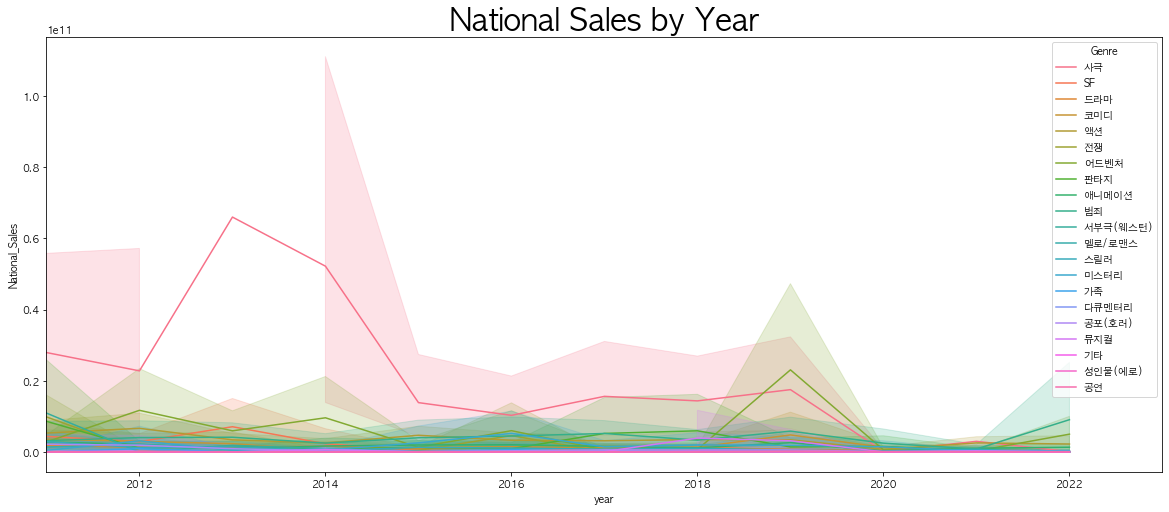

In [24]:

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data= data, x='year', y='National_Sales', hue='Genre')
plt.xlim([2011,2023])
plt.ylim()

# Title
plt.title('National Sales by Year', fontsize=30, fontweight="bold" )

plt.show()


In [25]:
data[data['year'] == 2014].National_Sales.describe()

count    1.095000e+03
mean     1.534787e+09
std      8.127790e+09
min      2.000000e+03
25%      2.700000e+05
50%      6.532200e+06
75%      8.906625e+07
max      1.357484e+11
Name: National_Sales, dtype: float64

In [26]:
# sns.stripplot(x='year', y ='Genre', data=data)

## 3-2. 장르별 국내관객, 국내수익금 변화 비교

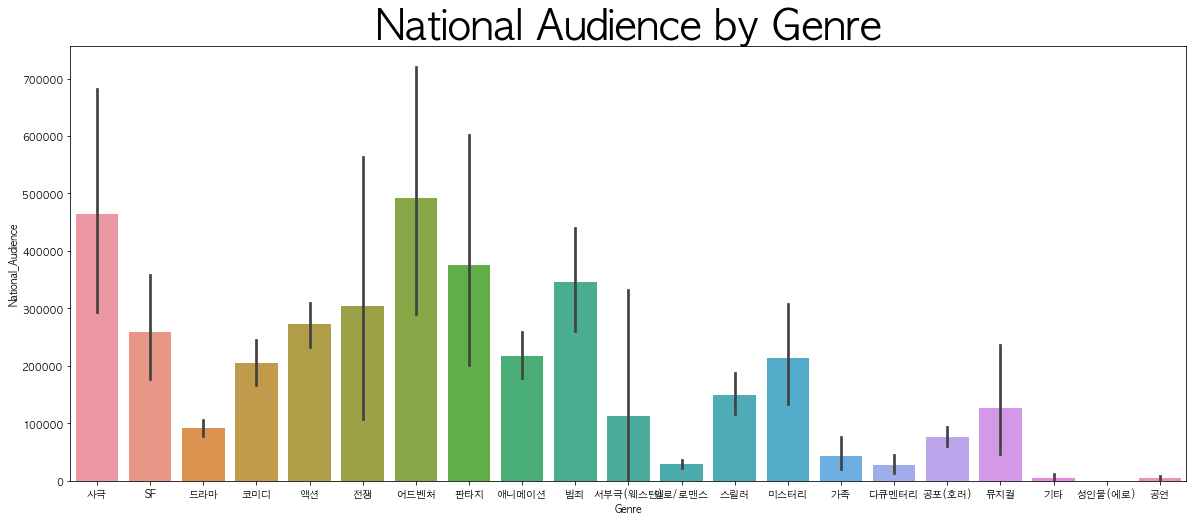

In [27]:
# 국내 관객 - 장르

fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.barplot(x=data['Genre'], y=data['National_Audience'])

# Title
plt.title('National Audience by Genre', fontsize=40, fontweight="bold" )


plt.show()

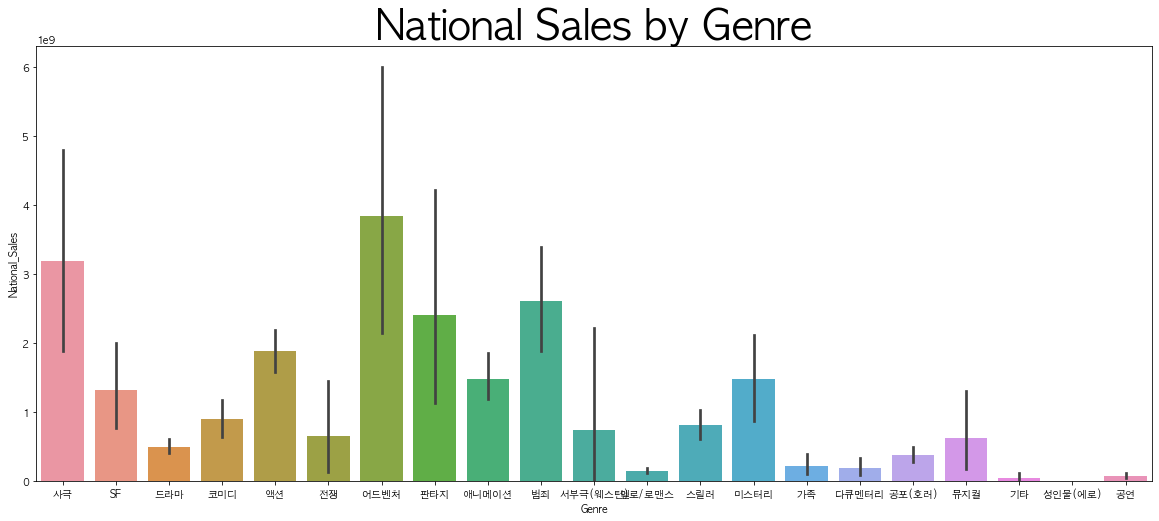

In [28]:
# 국내 수익금 - 장르 

fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.barplot(x=data['Genre'], y=data['National_Sales'])

# Title
plt.title('National Sales by Genre', fontsize=40, fontweight="bold" )


plt.show()

In [29]:
from collections import Counter

Counter(data['Genre']) # Counter({'aaa': 2, 'bbb': 2, 'ccc': 2})

Counter({'사극': 291,
         'SF': 625,
         '드라마': 6671,
         '코미디': 1667,
         '액션': 3072,
         '전쟁': 161,
         '어드벤처': 169,
         '판타지': 204,
         '애니메이션': 1184,
         '범죄': 582,
         '서부극(웨스턴)': 62,
         '멜로/로맨스': 5407,
         '스릴러': 796,
         '미스터리': 281,
         '가족': 244,
         '다큐멘터리': 718,
         '공포(호러)': 1220,
         '뮤지컬': 69,
         '기타': 133,
         nan: 191,
         '성인물(에로)': 2177,
         '공연': 273})

## 3-3. 연도별 국내관객 장르 
#연도별 top3 장르 

In [30]:
data

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,...,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화,2014.0,7.0,30.0
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,...,128447097523,13624328,40547523000,3993374,SF,12세이상관람가,독립/예술영화,2009.0,12.0,17.0
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,...,0,12302831,0,3660842,드라마,15세이상관람가,일반영화,2005.0,12.0,29.0
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,...,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화,2019.0,1.0,23.0
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,...,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화,2019.0,4.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,26193,T-34,알렉세이 시도로프,NaN,㈜코리아스크린,㈜코리아스크린,2019-06-27,개봉영화,장편,러시아,...,5000,1,0,0,전쟁,12세이상관람가,독립/예술영화,2019.0,6.0,27.0
26193,26194,V/H/S/2: 악마를 부르는 비디오,"가렛 에반스,아담 윈가드,에두아르도 산체스,그렉 헤일",NaN,(주)노이에스,(주)노이에스,2013-08-14,개봉영화,장편,미국,...,300000,75,0,0,공포(호러),청소년관람불가,일반영화,2013.0,8.0,14.0
26194,26195,VIP전용 여자,카네다 사토시,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-01,개봉영화,장편,일본,...,8000,1,0,0,성인물(에로),청소년관람불가,일반영화,2016.0,12.0,1.0
26195,26196,VJ의 은밀한 사생활,오카다 히로,NaN,(주)영진크리에이티브,(주)영진크리에이티브,2017-12-25,개봉영화,장편,일본,...,6000,1,0,0,멜로/로맨스,청소년관람불가,일반영화,2017.0,12.0,25.0


In [31]:
# 2000년대 이후 영화 장르로 제한
data[(data['year']>=2011.0)]
data2 = data[(data['year']>=2011.0)]
data2.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,...,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화,2014.0,7.0,30.0
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,...,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화,2019.0,1.0,23.0
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,...,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화,2019.0,4.0,24.0
7,8,도둑들,최동훈,(주)케이퍼필름,NaN,(주)쇼박스,2012-07-25,개봉영화,장편,한국,...,93665568500,12983330,26089426500,3468906,액션,15세이상관람가,일반영화,2012.0,7.0,25.0
8,9,알라딘,가이 리치,NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-05-23,개봉영화,장편,미국,...,106983620359,12555894,30218911039,3377404,어드벤처,전체관람가,일반영화,2019.0,5.0,23.0


In [32]:
data2.loc[:,['Genre', 'Release_Date', 'National_Audience', 'National_Sales']]
df_movie = data2.loc[:,['Genre', 'Release_Date', 'National_Audience', 'National_Sales']]
df_movie 

,Genre,Release_Date,National_Audience,National_Sales
0,사극,2014-07-30,17613682,135748398910
3,코미디,2019-01-23,16264944,139647979516
4,액션,2019-04-24,13934592,122182694160
7,액션,2012-07-25,12983330,93665568500
8,어드벤처,2019-05-23,12555894,106983620359
...,...,...,...,...
26192,전쟁,2019-06-27,1,5000
26193,공포(호러),2013-08-14,75,300000
26194,성인물(에로),2016-12-01,1,8000
26195,멜로/로맨스,2017-12-25,1,6000


In [33]:
# National_Sales

data2.loc[:,['Genre', 'year', 'National_Sales']]
df_Sales = data2.loc[:,['Genre', 'year', 'National_Sales']]
df_Sales

,Genre,year,National_Sales
0,사극,2014.0,135748398910
3,코미디,2019.0,139647979516
4,액션,2019.0,122182694160
7,액션,2012.0,93665568500
8,어드벤처,2019.0,106983620359
...,...,...,...
26192,전쟁,2019.0,5000
26193,공포(호러),2013.0,300000
26194,성인물(에로),2016.0,8000
26195,멜로/로맨스,2017.0,6000


In [34]:
# National_Sales by Year

df_Sales.groupby(by=['year', 'Genre']).sum()  

National_Sales
year   Genre                 
2011.0 SF         39508921900
       가족             2154000
       공포(호러)     36924364000
       다큐멘터리       1635633300
       드라마       300861767200
...                       ...
2022.0 액션        166458608310
       어드벤처       25101024660
       전쟁            14735500
       코미디         1366523220
       판타지          167919300

[243 rows x 1 columns]

<AxesSubplot:xlabel='None,year'>

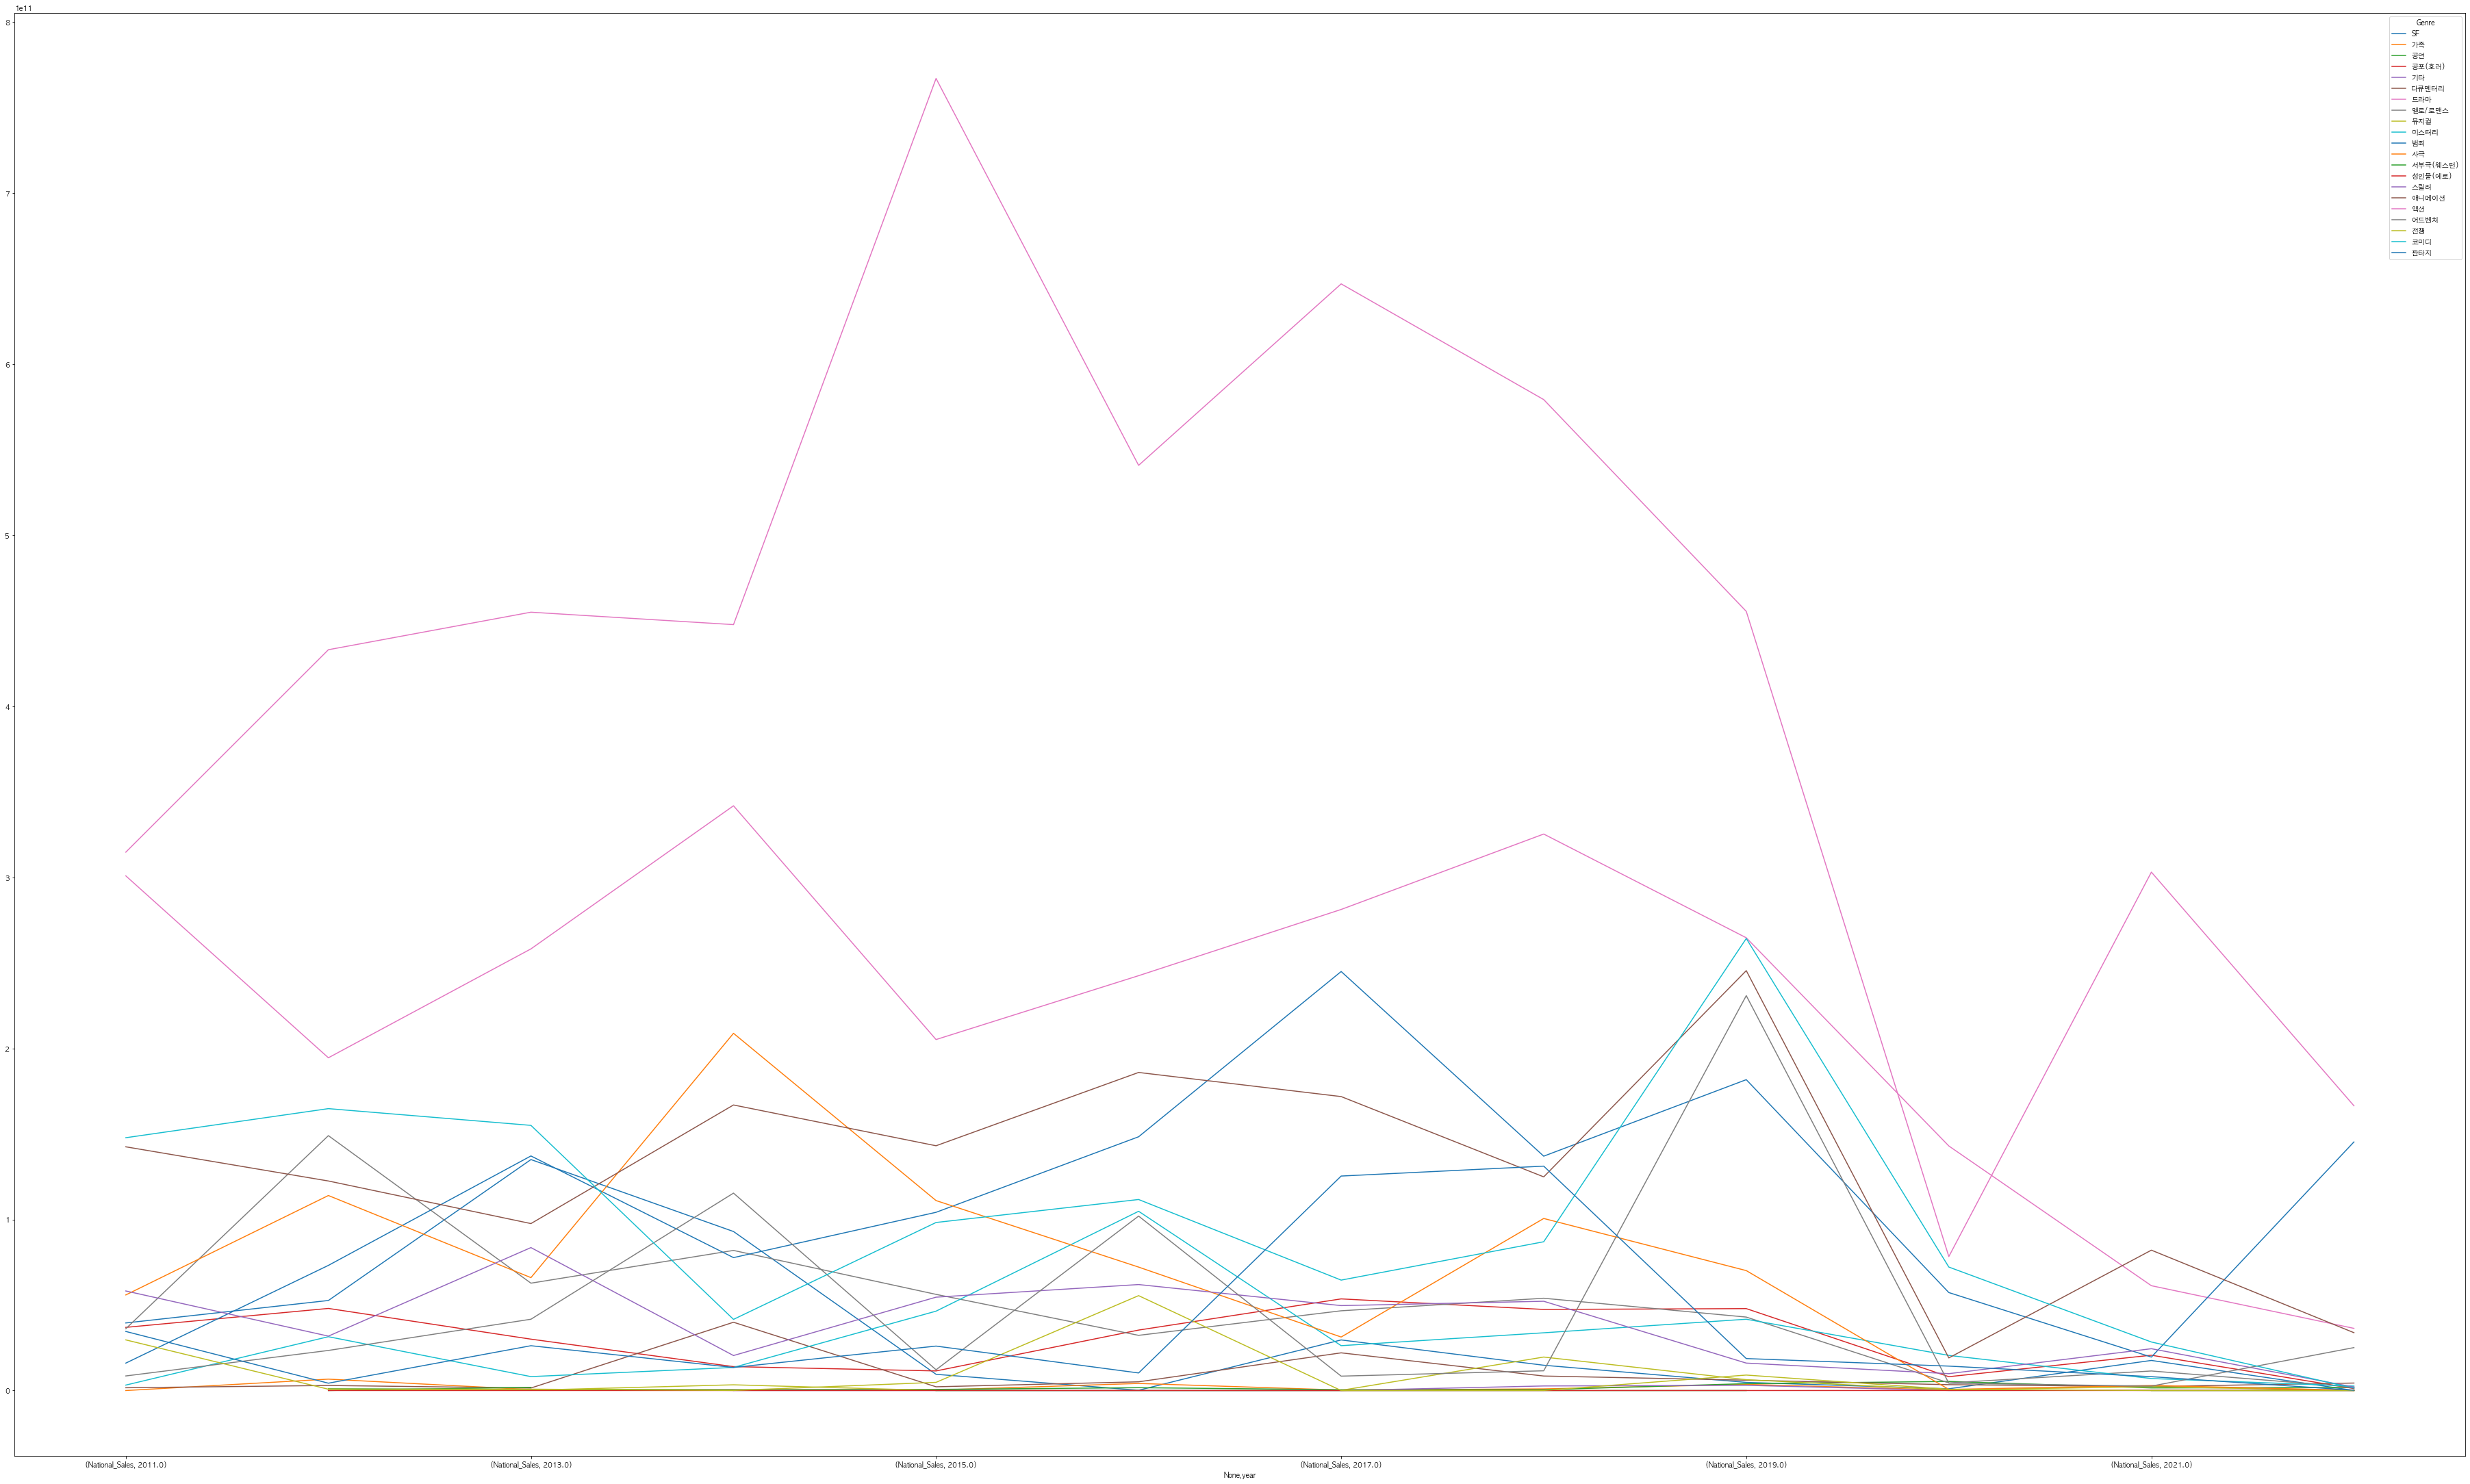

In [35]:
# Graph: National_Sales by Year 

fig, ax = plt.subplots(constrained_layout=True, figsize = (50,30))
df_Sales.groupby(by=['Genre', 'year']).sum().unstack().T.plot(ax=ax)

In [36]:
# National_Audience 

data2.loc[:,['Genre', 'year', 'National_Audience']]
df_Audience = data2.loc[:,['Genre', 'year', 'National_Audience']]
df_Audience

,Genre,year,National_Audience
0,사극,2014.0,17613682
3,코미디,2019.0,16264944
4,액션,2019.0,13934592
7,액션,2012.0,12983330
8,어드벤처,2019.0,12555894
...,...,...,...
26192,전쟁,2019.0,1
26193,공포(호러),2013.0,75
26194,성인물(에로),2016.0,1
26195,멜로/로맨스,2017.0,1


In [37]:
# National_Audience by Year

df_Audience.groupby(by=['year', 'Genre']).sum().unstack().T

year                            2011.0      2012.0      2013.0      2014.0  \
                  Genre                                                      
National_Audience SF         4917595.0   6797532.0  17360616.0  11654868.0   
                  가족             319.0    923990.0     82628.0     56562.0   
                  공연               NaN     77802.0     33056.0     30793.0   
                  공포(호러)     5020539.0   6706827.0   4214958.0   1834531.0   
                  기타               NaN      3196.0         NaN      2000.0   
                  다큐멘터리       242413.0    378313.0    214740.0   5160797.0   
                  드라마       40278471.0  26690447.0  36005580.0  44815941.0   
                  멜로/로맨스     4876766.0  20529865.0   8663890.0  10626841.0   
                  뮤지컬              NaN     99230.0     17923.0    405635.0   
                  미스터리        415992.0   4235520.0   1143659.0   1772205.0   
                  범죄         2196465.0   9673053.0  19034284.0   9907438.0   
                  사극         7478523.0  15785402.0   9134586.0  27028168.0   
                  서부극(웨스턴)         NaN       866.0    260144.0         NaN   
                  성인물(에로)          NaN      1348.0      3422.0      4650.0   
                  스릴러        7637467.0   4323985.0  11809930.0   2605255.0   
                  애니메이션     17983506.0  16414935.0  14430095.0  21722798.0   
                  액션        38627239.0  56403557.0  61542062.0  56142016.0   
                  어드벤처        945833.0   2819013.0   4994067.0  14766476.0   
                  전쟁         3985356.0    107173.0    119290.0      9904.0   
                  코미디       19433690.0  22610074.0  21737226.0   5701464.0   
                  판타지        4404289.0    609660.0   3571942.0   1707157.0   

year                            2015.0      2016.0      2017.0      2018.0  \
                  Genre                                                      
National_Audience SF         1189556.0     20398.0   3592970.0   1758883.0   
                  가족           36632.0    563336.0     36314.0    122992.0   
                  공연           36243.0     86134.0     23618.0     23998.0   
                  공포(호러)     1485396.0   4382795.0   6625895.0   5741029.0   
                  기타            1567.0       707.0      1275.0    315312.0   
                  다큐멘터리       294086.0    662567.0   2832125.0   1055644.0   
                  드라마       26605722.0  30639544.0  35737487.0  38725999.0   
                  멜로/로맨스     7225736.0   4079494.0   5721227.0   6580506.0   
                  뮤지컬           5029.0         NaN      8350.0   2289501.0   
                  미스터리       5964650.0  12959994.0   3355634.0   3931815.0   
                  범죄        12980062.0  18619901.0  30399536.0  16025059.0   
                  사극        14206710.0   9108385.0   3859185.0  11967735.0   
                  서부극(웨스턴)         1.0         1.0        28.0        29.0   
                  성인물(에로)       5169.0       321.0       452.0       280.0   
                  스릴러        6974666.0   7544635.0   6165999.0   6285691.0   
                  애니메이션     19169208.0  24151909.0  22647525.0  16123050.0   
                  액션        94636149.0  65447227.0  79432342.0  66909044.0   
                  어드벤처       1552598.0  12282869.0   1055974.0   1412408.0   
                  전쟁          615894.0   7097451.0       113.0      8071.0   
                  코미디       12602475.0  13992423.0   8296538.0  10633506.0   
                  판타지        3329220.0   1288849.0  15520001.0  15669298.0   

year                            2019.0      2020.0      2021.0      2022.0  
                  Genre                                                     
National_Audience SF          548767.0    119675.0   1633075.0      2016.0  
                  가족          448192.0     35663.0     15181.0     40696.0  
                  공연          405572.0    308677.0     91466.0     99705.0  
                  공포(호러) 

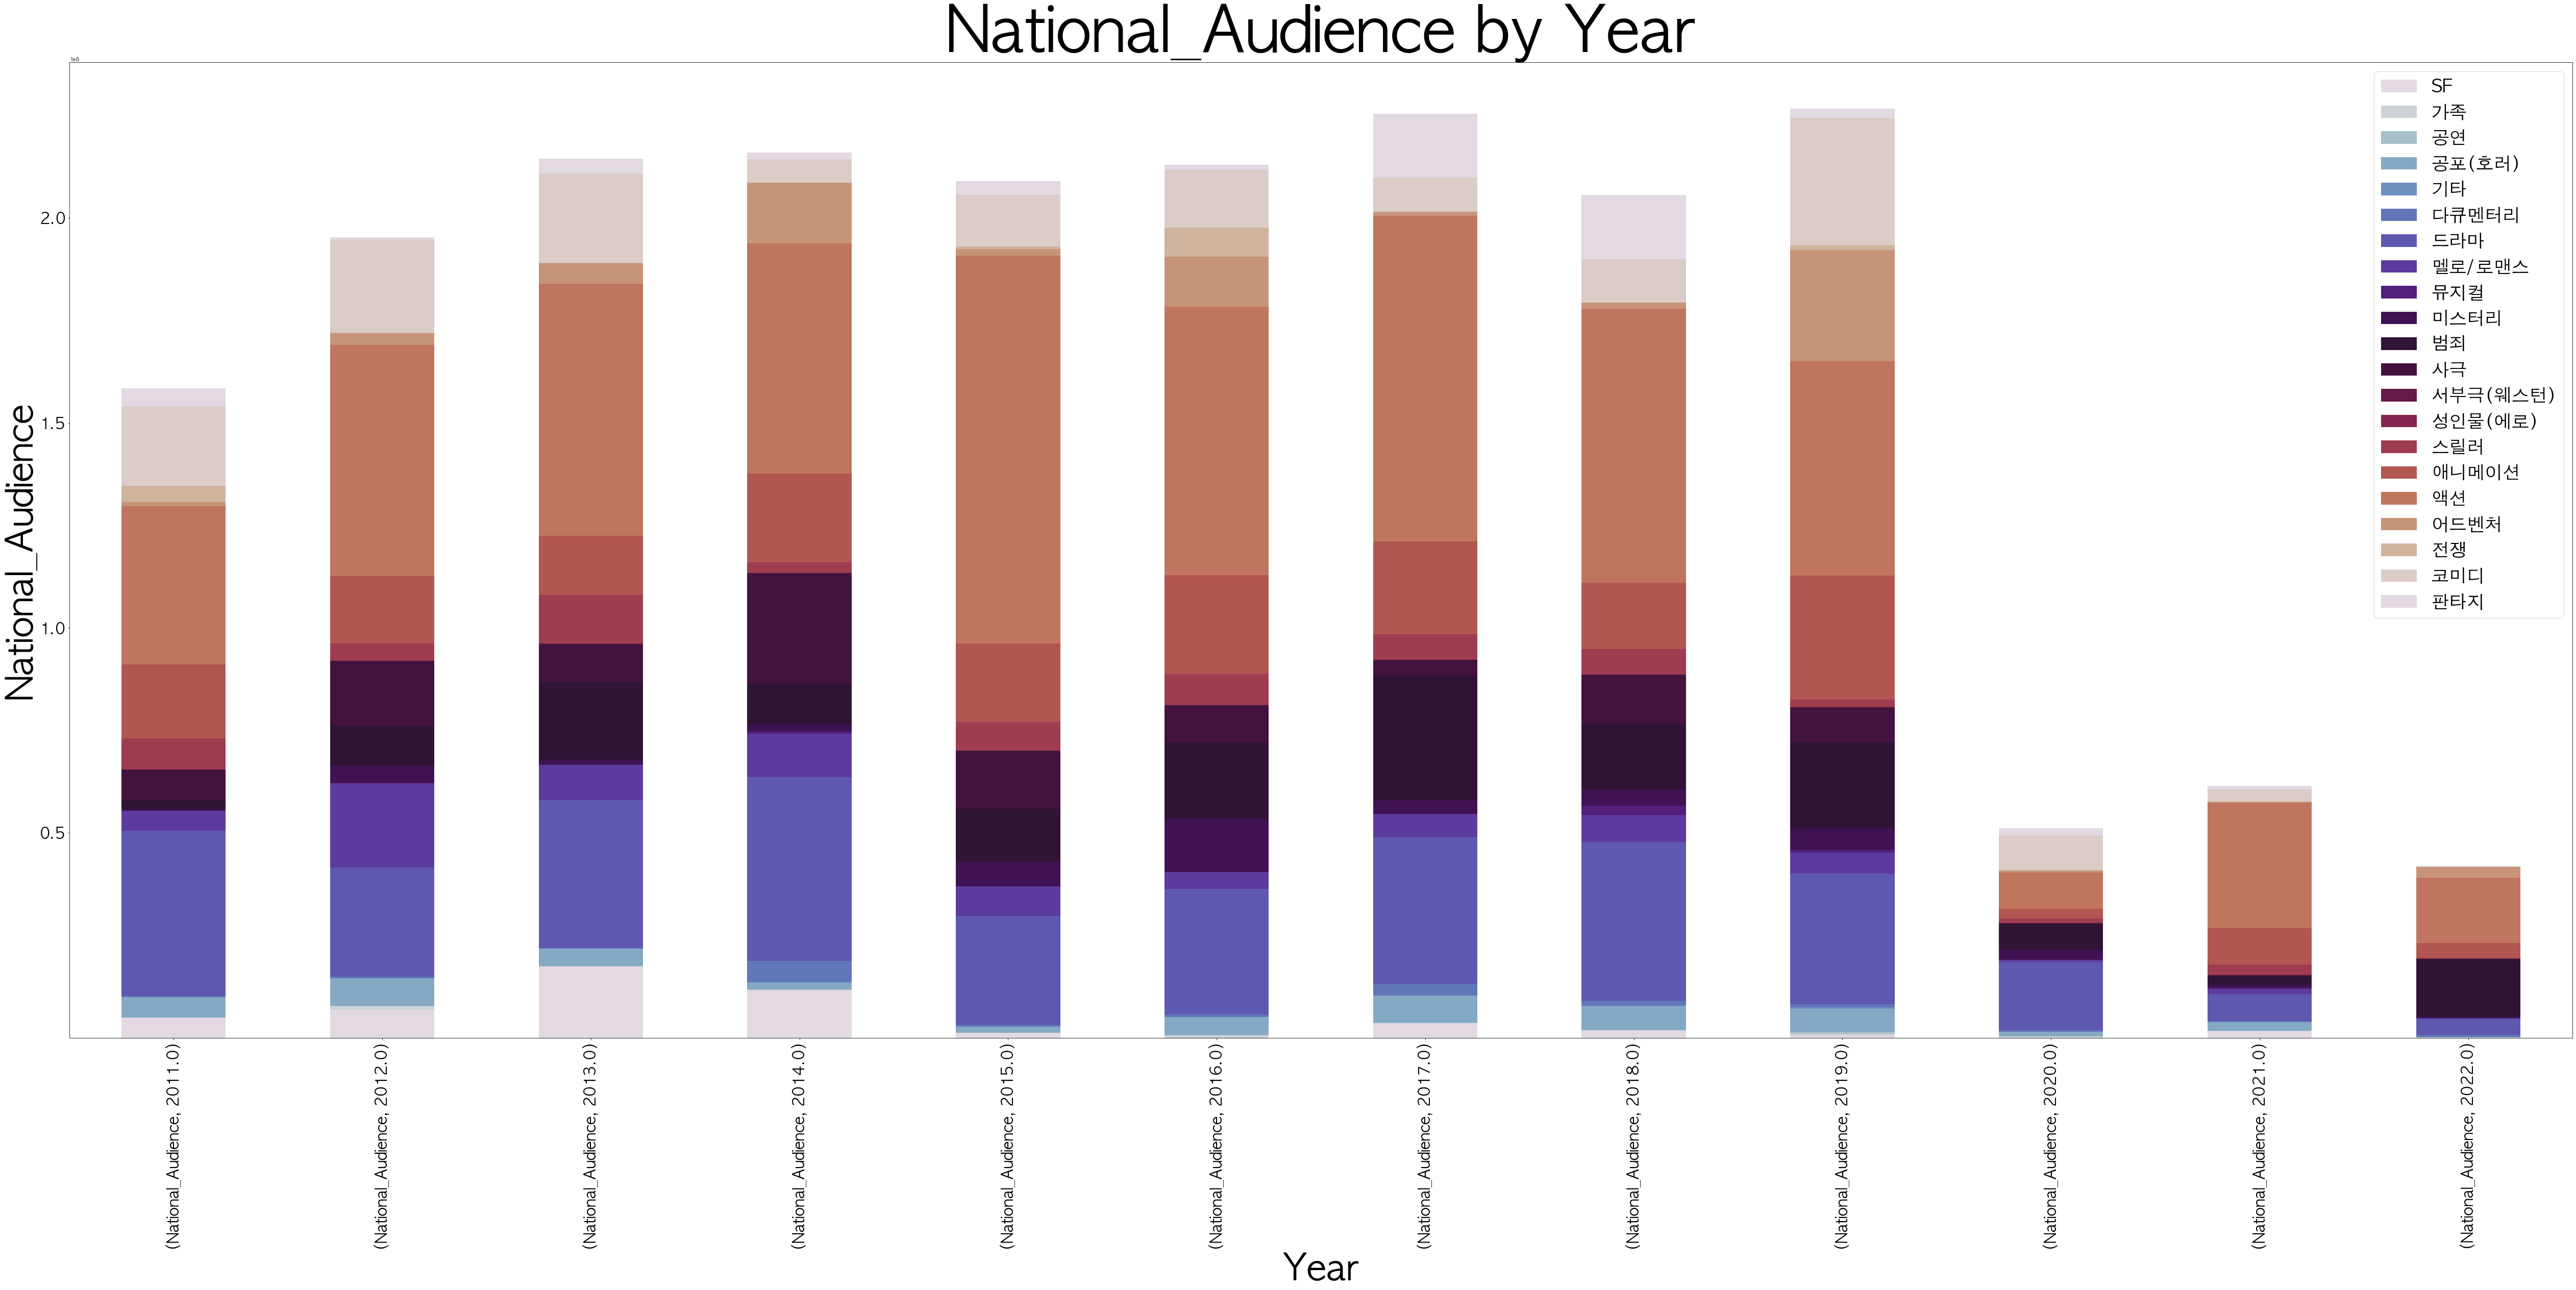

In [38]:
## Graph: National_Audience by Year

fig, ax = plt.subplots(constrained_layout=True, figsize = (70,35))
df_Audience.groupby(by=['Genre', 'year']).sum().unstack().T.plot.bar(stacked=True, ax=ax, cmap='twilight')

# Title
plt.title('National_Audience by Year', fontsize=120, fontweight="bold" )

# Year x axis
plt.xlabel("Year" , fontsize=70, fontweight="bold")

# National_Audience y axis
plt.ylabel("National_Audience" , fontsize=70, fontweight="bold")

#  x, y size
plt.xticks(fontsize=30, fontweight="bold")
plt.yticks(fontsize=30, fontweight="bold")

# legend size
plt.legend( prop={"size":35})


# plt.get_cmap('twilight')

In [39]:
# df_movie2.groupby(by=['year', 'Genre']).sum()   # year 가 나올 수 없는 형태... ?



# # df_genre = df_movie2.groupby(by='Genre').sum()
# # df_genre


In [40]:
# # 2000년대 이후 영화 장르
# df_movie2[(df_movie2['year']>=2011.0)]
# df_movie3 = df_movie2[(df_movie2['year']>=2011.0)]
# df_movie3

In [53]:

cross_tab_prop = pd.crosstab(index=df_Audience['year'],
                             columns=df_Audience['Genre'],
                             values=df_Audience['National_Audience'],
                             aggfunc=sum,
                             normalize="index")
cross_tab_prop.T

year,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Genre,,,,,,,,,,,,
SF,0.031037,0.034825,0.080983,0.053969,5.693923e-03,9.579722e-05,1.594660e-02,8.555717e-03,2.421977e-03,0.002343,2.658931e-02,0.000048
가족,0.000002,0.004734,0.000385,0.000262,1.753426e-04,2.645653e-03,1.611716e-04,5.982688e-04,1.978091e-03,0.000698,2.471731e-04,0.000973
공연,0.000000,0.000399,0.000154,0.000143,1.734806e-04,4.045199e-04,1.048233e-04,1.167332e-04,1.789988e-03,0.006044,1.489226e-03,0.002383
공포(호러),0.031686,0.034360,0.019662,0.008495,7.109989e-03,2.058337e-02,2.940757e-02,2.792603e-02,2.522363e-02,0.018699,3.354260e-02,0.002954
기타,0.000000,0.000016,0.000000,0.000009,7.500595e-06,3.320357e-06,5.658805e-06,1.533769e-03,1.515451e-03,0.000084,2.629501e-04,0.000156
다큐멘터리,0.001530,0.001938,0.001002,0.023898,1.407671e-03,3.111681e-03,1.256976e-02,5.134959e-03,3.428610e-03,0.008028,4.185955e-03,0.011261
드라마,0.254212,0.136740,0.167957,0.207524,1.273508e-01,1.438956e-01,1.586129e-01,1.883745e-01,1.401943e-01,0.326499,1.082540e-01,0.091060
멜로/로맨스,0.030779,0.105178,0.040415,0.049208,3.458667e-02,1.915895e-02,2.539240e-02,3.200949e-02,2.275038e-02,0.010224,1.947772e-02,0.005460
뮤지컬,0.000000,0.000508,0.000084,0.001878,2.407179e-05,0.000000e+00,3.705962e-05,1.113680e-02,3.346696e-03,0.000678,3.378413e-03,0.000023


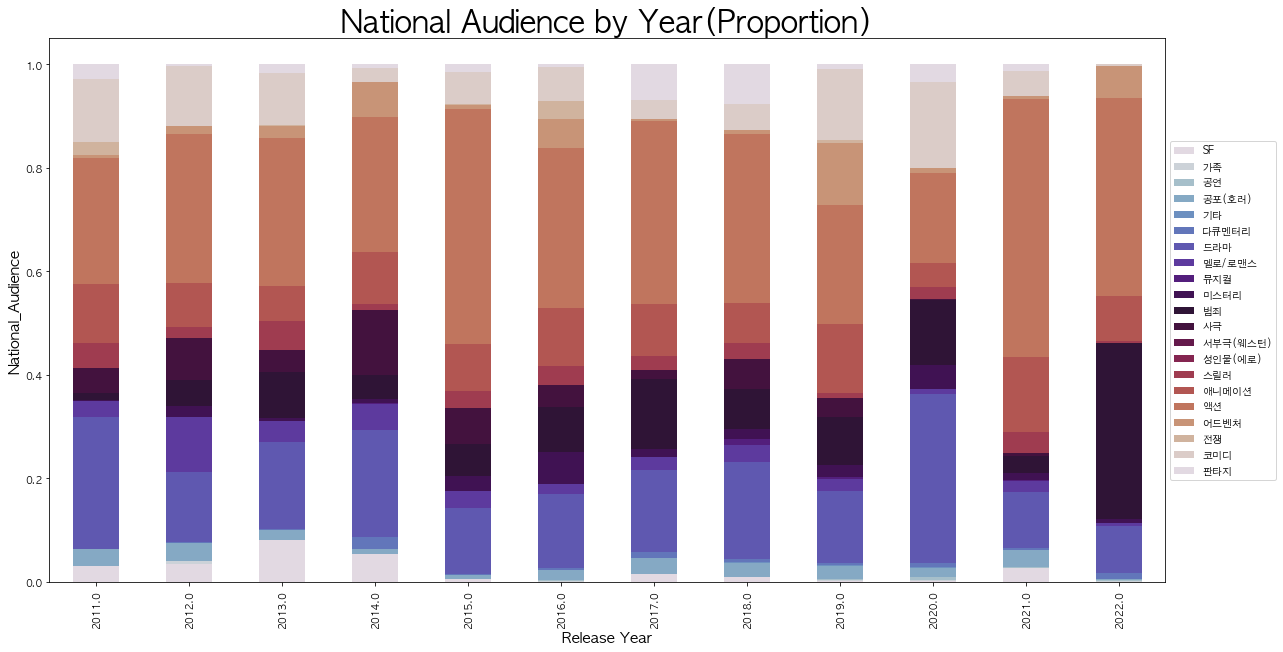

In [54]:
## Graph: National_Audience by Year(Proportion)

cross_tab_prop.plot(kind='bar',
                    stacked=True, 
                    colormap='twilight', 
                    figsize=(20, 10))

# Title
plt.title('National Audience by Year(Proportion)', fontsize=30, fontweight="bold" )

# Label
plt.xlabel("Release Year", fontsize=15, fontweight="bold")
plt.ylabel("National_Audience", fontsize=15, fontweight="bold")

# Legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#colormap='tab10'
